Sample Mean  : 502.67
Z-statistic  : 0.1461
P-value      : 0.8839
Conclusion   : Fail to reject H₀ – No significant difference in mean.


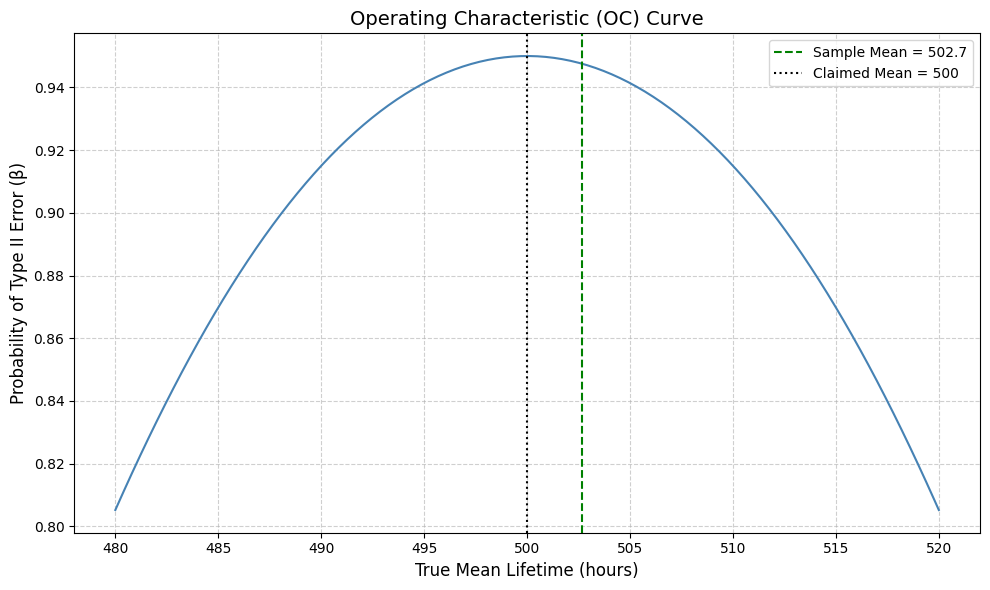

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Battery lifetime data (n = 30)
data = np.array([
    495, 520, 510, 505, 480, 500, 515, 495, 510, 505,
    490, 515, 495, 505, 500, 510, 485, 495, 500, 520,
    510, 495, 505, 500, 515, 505, 495, 510, 500, 495
])

# Known population standard deviation
sigma = 100
mu_0 = 500           # Claimed mean
alpha = 0.05         # Significance level
n = len(data)

# Sample statistics
sample_mean = np.mean(data)
z_stat = (sample_mean - mu_0) / (sigma / np.sqrt(n))
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# Output results
print(f"Sample Mean  : {sample_mean:.2f}")
print(f"Z-statistic  : {z_stat:.4f}")
print(f"P-value      : {p_value:.4f}")
print("Conclusion   :", "Reject H₀ – Significant difference in mean." if p_value < alpha
      else "Fail to reject H₀ – No significant difference in mean.")

# Plotting the OC Curve
mu_range = np.linspace(480, 520, 200)
beta_values = norm.cdf(norm.ppf(1-alpha/2)-(mu_range-mu_0) / (sigma/np.sqrt(n)))-\
              norm.cdf(-norm.ppf(1 - alpha / 2) - (mu_range - mu_0) / (sigma / np.sqrt(n)))

plt.figure(figsize=(10, 6))
plt.plot(mu_range, beta_values, color='steelblue')
plt.title('Operating Characteristic (OC) Curve', fontsize=14)
plt.xlabel('True Mean Lifetime (hours)', fontsize=12)
plt.ylabel('Probability of Type II Error (β)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(sample_mean, color='green', linestyle='--', label=f'Sample Mean = {sample_mean:.1f}')
plt.axvline(mu_0, color='black', linestyle=':', label='Claimed Mean = 500')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# Data: daily water usage (in gallons)
data = [340, 344, 362, 375, 356, 386, 354, 364, 332, 402, 340, 355, 362, 322, 372, 324, 318, 360, 338, 370]

# Given values
mu_0 = 350  # population mean under null hypothesis
sigma = 12  # standard deviation (square root of population variance 144)
n = len(data)  # sample size
# Sample mean
sample_mean = np.mean(data)
# Z-test statistic
z_value = (sample_mean - mu_0) / (sigma / np.sqrt(n))
# P-value for two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_value)))

# Display results
print(f"Sample Mean: {sample_mean}")
print(f"Z-value: {z_value}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is sufficient evidence to contradict the official's claim.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to contradict the official's claim.")


Sample Mean: 353.8
Z-value: 1.416176385749871
P-value: 0.1567238679451175
Fail to reject the null hypothesis. There is not enough evidence to contradict the official's claim.


In [4]:
import numpy as np
from scipy.stats import t

# Data: daily water usage (in gallons)
data = [340, 344, 362, 375, 356, 386, 354, 364, 332, 402, 340, 355, 362, 322, 372, 324, 318, 360, 338, 370]

# Given values
mu_0 = 350  # population mean under null hypothesis
n = len(data)  # sample size

# Sample mean and sample standard deviation
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # sample standard deviation (ddof=1 for unbiased estimate)

# T-test statistic
t_value = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# P-value for two-tailed test
p_value = 2 * (1 - t.cdf(abs(t_value), df=n - 1))

# Display results
print(f"Sample Mean: {sample_mean}")
print(f"T-value: {t_value}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is sufficient evidence to contradict the official's claim.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to contradict the official's claim.")


Sample Mean: 353.8
T-value: 0.7778411328447066
P-value: 0.4462410900531899
Fail to reject the null hypothesis. There is not enough evidence to contradict the official's claim.


In [9]:
import numpy as np
from scipy.stats import t

# Data: weights before and after the diet (in kg)
before_weights = np.array([85.2, 78.5, 92.3, 80.0, 88.7, 76.4, 90.5, 84.1, 79.0, 86.2])
after_weights = np.array([82.5, 75.8, 90.1, 77.2, 85.4, 74.5, 87.6, 81.3, 76.8, 83.0])

# Calculate the differences (after - before)
differences = after_weights - before_weights

# Calculate the sample mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # sample standard deviation
n = len(differences)

# Calculate the t-statistic
t_statistic = mean_diff / (std_diff / np.sqrt(n))

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - t.cdf(abs(t_statistic), df=n - 1))

# Display results
print(f"Mean of differences: {mean_diff}")
print(f"Standard deviation of differences: {std_diff}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. The diet plan has a significant effect on body weight.")
else:
    print("Fail to reject the null hypothesis. The diet plan does not have a significant effect on body weight.")



Mean of differences: -2.6700000000000017
Standard deviation of differences: 0.4473378042498864
T-statistic: -18.874508866532317
P-value: 1.5123605479061553e-08
Reject the null hypothesis. The diet plan has a significant effect on body weight.


In [10]:
import numpy as np
from scipy.stats import chi2

# Original data: volumes of bottles in mL
volumes = np.array([502, 498, 505, 497, 503, 499, 504, 496, 501, 500, 506, 495, 502, 498, 504])

# Step 1: Calculate the sample variance
n = len(volumes)
sample_mean = np.mean(volumes)
sample_variance = np.var(volumes, ddof=1)

# Step 2: Perform a chi-square test
sigma_0_squared = 4  # Hypothesized population variance
chi_square_statistic = (n - 1) * sample_variance / sigma_0_squared
degrees_of_freedom = n - 1

# Critical value at α = 0.01 (right-tailed)
alpha = 0.01
critical_value = chi2.ppf(1 - alpha, df=degrees_of_freedom)

# Calculate p-value for chi-square test
p_value = 1 - chi2.cdf(chi_square_statistic, df=degrees_of_freedom)

# Step 3: Removing outliers (volumes < 495 or > 505)
filtered_volumes = volumes[(volumes >= 495) & (volumes <= 505)]

# Recalculate sample variance for the filtered data
n_filtered = len(filtered_volumes)
sample_variance_filtered = np.var(filtered_volumes, ddof=1)
chi_square_statistic_filtered = (n_filtered - 1) * sample_variance_filtered / sigma_0_squared
critical_value_filtered = chi2.ppf(1 - alpha, df=n_filtered - 1)
p_value_filtered = 1 - chi2.cdf(chi_square_statistic_filtered, df=n_filtered - 1)

# Display results
print(f"Sample Variance: {sample_variance:.4f}")
print(f"Chi-square Statistic: {chi_square_statistic:.4f}")
print(f"Critical Value (α=0.01, df={degrees_of_freedom}): {critical_value:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion based on original data
if chi_square_statistic > critical_value:
    print("Reject H₀: The machine violates the variance specification.")
else:
    print("Fail to reject H₀: The machine does not violate the variance specification.")

# Results after removing outliers
print(f"Filtered Sample Variance: {sample_variance_filtered:.4f}")
print(f"Chi-square Statistic (filtered): {chi_square_statistic_filtered:.4f}")
print(f"Critical Value (α=0.01, df={n_filtered - 1}): {critical_value_filtered:.4f}")
print(f"P-value (filtered): {p_value_filtered:.4f}")

# Conclusion based on filtered data
if chi_square_statistic_filtered > critical_value_filtered:
    print("Reject H₀: The machine violates the variance specification after removing outliers.")
else:
    print("Fail to reject H₀: The machine does not violate the variance specification after removing outliers.")


Sample Variance: 11.6667
Chi-square Statistic: 40.8333
Critical Value (α=0.01, df=14): 29.1412
P-value: 0.0002
Reject H₀: The machine violates the variance specification.
Filtered Sample Variance: 10.2198
Chi-square Statistic (filtered): 33.2143
Critical Value (α=0.01, df=13): 27.6882
P-value (filtered): 0.0016
Reject H₀: The machine violates the variance specification after removing outliers.
